<a href="https://colab.research.google.com/github/Millimono/DEEP-LERANING/blob/main/DEPP_Learning_transfert%20learning%20Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTER LES LIBRAIRIES

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

%matplotlib inline
tf.__version__

'2.4.0'

In [ ]:
#data_path='/content/BrainCancer'

In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# TELECHAARGER LA DATA DEPUIS COLAB

In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224]


#define paths
tumor_path = '/content/sample_data/brainCancer/yes'
notumor_path = '/content/sample_data/brainCancer/no'

# Use glob to grab images from path .jpg or jpeg
tumor_files = glob(tumor_path + '/*')
notumor_files = glob(notumor_path + '/*')

In [ ]:
# Visualize file variable contents
print("First 5 tumor Files: ",tumor_files[0:5])
print("Total Count: ",len(tumor_files))
print("First 5 Notumor Files: ",notumor_files[0:5])
print("Total Count: ",len(notumor_files))

First 5 tumor Files:  ['/content/sample_data/brainCancer/yes/Y8.jpg', '/content/sample_data/brainCancer/yes/Y146.JPG', '/content/sample_data/brainCancer/yes/Y107.jpg', '/content/sample_data/brainCancer/yes/Y258.JPG', '/content/sample_data/brainCancer/yes/Y96.jpg']
Total Count:  155
First 5 Notumor Files:  ['/content/sample_data/brainCancer/no/no 2.jpg', '/content/sample_data/brainCancer/no/no 10.jpg', '/content/sample_data/brainCancer/no/24 no.jpg', '/content/sample_data/brainCancer/no/No13.jpg', '/content/sample_data/brainCancer/no/43 no.jpg']
Total Count:  98


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ajouter des  étiquettes à nos images 

In [ ]:
# Fetch Images and Class Labels from Files
tumor_labels = []
notumor_labels = []

tumor_images=[]
notumor_images=[]

for i in range(len(tumor_files)):
  image = cv2.imread(tumor_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  tumor_images.append(image) # append image
  tumor_labels.append('TUMOR') #append class label
for i in range(len(notumor_files)):
  image = cv2.imread(notumor_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  notumor_images.append(image)
  notumor_labels.append('NoTUMOR')

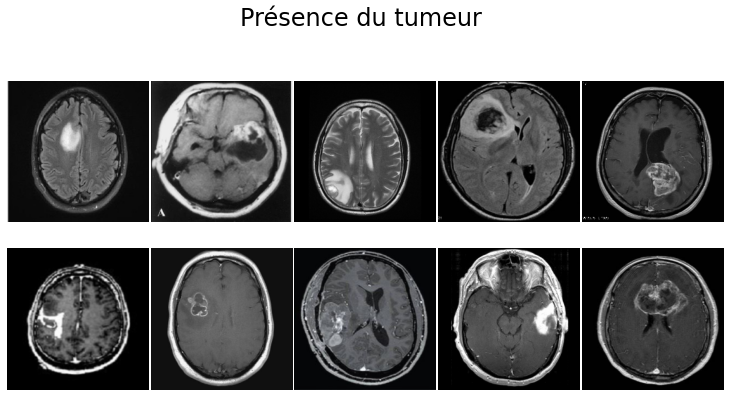

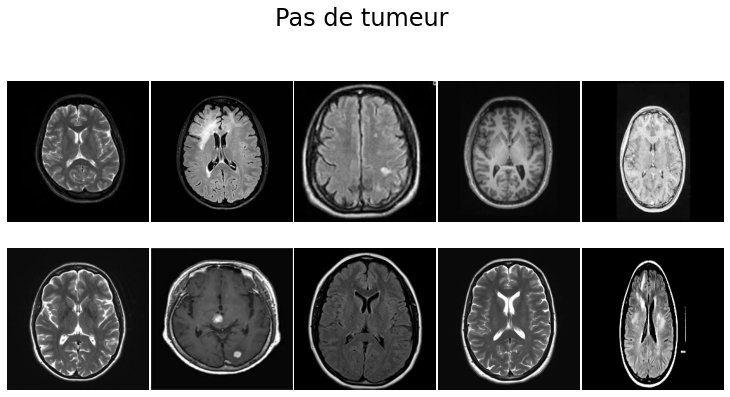

In [ ]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2, 5
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(tumor_images, 'Présence du tumeur ')
plot_images(notumor_images, 'Pas de tumeur ')

# Split into training and testing sets for both types of images

In [ ]:
# Convert to array and Normalize to interval of [0,1]
tumor_images = np.array(tumor_images) / 255
notumor_images = np.array(notumor_images) / 255

In [ ]:
# Split into training and testing sets for both types of images
tumor_x_train, tumor_x_test, tumor_y_train, tumor_y_test = train_test_split(
    tumor_images, tumor_labels, test_size=0.2)
notumor_x_train, notumor_x_test, notumor_y_train, notumor_y_test = train_test_split(
    notumor_images, notumor_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((notumor_x_train, tumor_x_train), axis=0)
X_test = np.concatenate((notumor_x_test, tumor_x_test), axis=0)
y_train = np.concatenate((notumor_y_train, tumor_y_train), axis=0)
y_test = np.concatenate((notumor_y_test, tumor_y_test), axis=0)

# Make labels into categories - either 0 or 1, for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

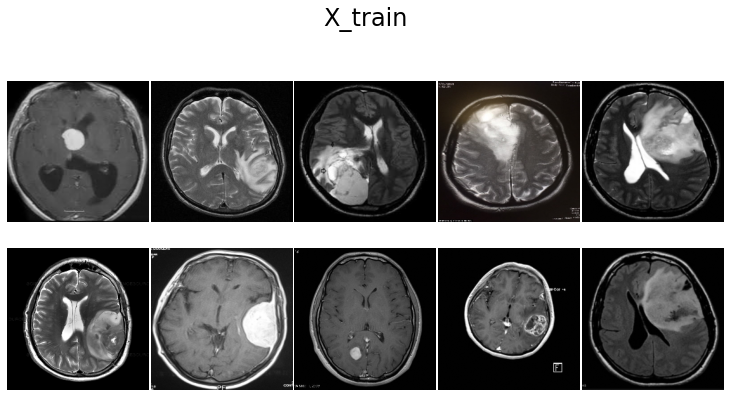

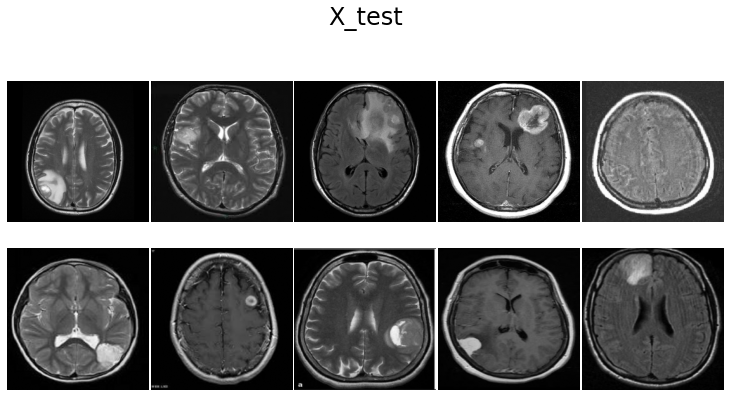

In [ ]:
plot_images(tumor_x_train, 'X_train')
plot_images(tumor_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

# Pré-Trained Modele : VGG16

In [ ]:
IMG_SHAPE = (224, 224,3)

In [ ]:
#from tensorflow.keras.applications import Xception

In [ ]:
#base_model =  Xception(weights="imagenet", include_top=False,
#    input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
# useful for getting number of classes
#folders = glob(train_dir+'/*')
#folders

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activa+tion='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
#DATA AUGMENTATION
#train_datagen = ImageDataGenerator(rescale = 1./255,
 #                                shear_range = 0.2,
  #                                 zoom_range = 0.2,
   #                                horizontal_flip = True)
#
#test_datagen = ImageDataGenerator(rescale = 1./255)

#training_set = train_datagen.flow_from_directory(train_dir,
 #                                                target_size = (224, 224),
  #                                               batch_size = 32,
  #                                               class_mode = 'categorical')

#test_set = test_datagen.flow_from_directory(test_dir,
 #                                           target_size = (224, 224),
  #                                          batch_size = 32,
  #                                          class_mode = 'categorical')

DATA AUGMENTATION

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
batch_size = 32
epochs =20
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/20
6/6 [==============================] - 128s 21s/step - loss: 0.7032 - accuracy: 0.5061 - val_loss: 0.6461 - val_accuracy: 0.6078
Epoch 2/20
6/6 [==============================] - 127s 21s/step - loss: 0.6376 - accuracy: 0.6105 - val_loss: 0.4789 - val_accuracy: 0.7647
Epoch 3/20
6/6 [==============================] - 126s 21s/step - loss: 0.5827 - accuracy: 0.6884 - val_loss: 0.5781 - val_accuracy: 0.7451
Epoch 4/20
6/6 [==============================] - 127s 21s/step - loss: 0.4812 - accuracy: 0.7614 - val_loss: 0.4992 - val_accuracy: 0.8235
Epoch 5/20
6/6 [==============================] - 127s 21s/step - loss: 0.5443 - accuracy: 0.7088 - val_loss: 0.4316 - val_accuracy: 0.7647
Epoch 6/20
6/6 [==============================] - 126s 21s/step - loss: 0.4980 - accuracy: 0.7379 - val_loss: 0.4960 - val_accuracy: 0.8431
Epoch 7/20
6/6 [==============================] - 127s 21s/step - loss: 0.5088 - accuracy: 0.8043 - val_loss: 0.4076 - val_accuracy: 0.8431
Epoch 8/20
6/6 [====

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)


2/2 - 25s - loss: 0.4355 - accuracy: 0.8039


[0.43553802371025085, 0.8039215803146362]

In [ ]:
#model.fit_generator(training_set, epochs=5, validation_data=test_set)

# Save Model and Weights
model.save('braincancer_rmi.h5')
model.save_weights('braincancer_weights_rmi.hdf5')

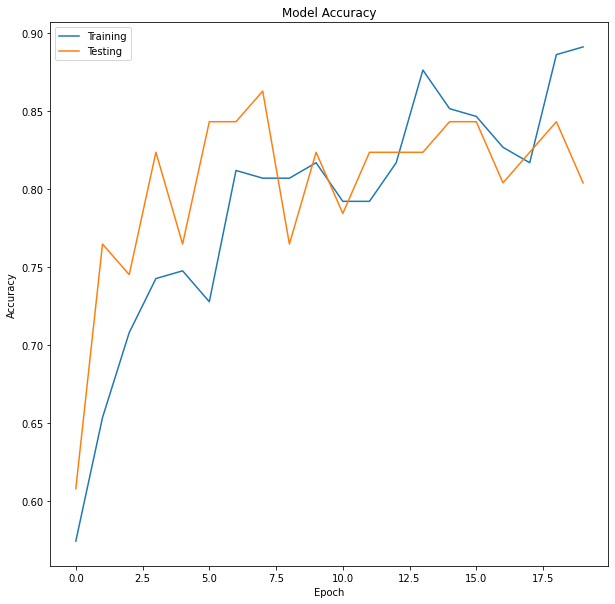

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_accuracy.png')
plt.show()

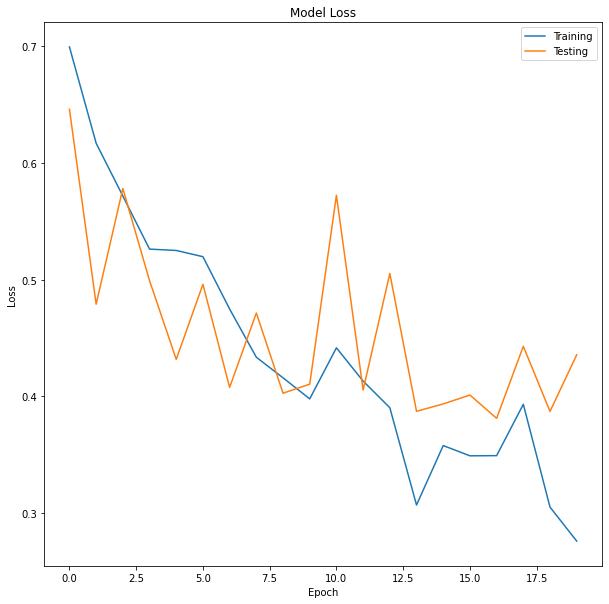

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_loss.png')
plt.show()

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

Confusion Matrix without Normalization


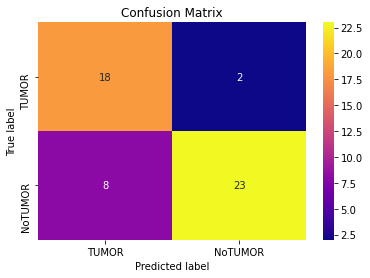

Confusion Matrix with Normalized Values


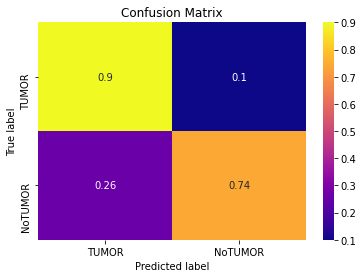

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['TUMOR','NoTUMOR']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')